In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
    'acceleration', 'model_year', 'origin', 'car_name'
]

In [ ]:
df = pd.read_csv("./data/auto-mpg.data", sep = r"\s+", header = None, names = column_names, na_values = "?")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
df.shape

(398, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [7]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [8]:
# for instance we can just remove those 6 rows
df.dropna(inplace = True)

In [9]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [10]:
REGION_NAMES = {
    1: "USA(Ameria)", 
    2: "Europe", 
    3:"Japanese(Asian)"
}

***

# ⛽ What is MPG? (Miles Per Gallon)

**MPG** stands for **Miles Per Gallon** and is the standard measurement of a car's **fuel economy** or **fuel efficiency**.

It answers the question: **How many miles can your car travel on one gallon of fuel?**

| MPG Value | Meaning |
| :--- | :--- |
| **Higher MPG** | Better fuel efficiency, lower running costs, and fewer emissions. |
| **Lower MPG** | Poorer fuel efficiency, higher running costs, and more emissions. |

***

## Factors Affecting MPG

A car's MPG is influenced by both its design and how it's driven.

### 1. Vehicle Factors (Design)

These are inherent characteristics of the car:

| Factor | Typical Effect on MPG | Explanation |
| :--- | :--- | :--- |
| **Weight** | $\downarrow$ (More weight = Lower MPG) | The heavier a vehicle, the more energy the engine must use to start moving and maintain speed. |
| **Displacement** | $\downarrow$ (Larger displacement = Lower MPG) | Larger engine volume means it consumes more air and fuel with each cycle. |
| **Cylinders** | $\downarrow$ (More cylinders = Lower MPG) | Generally indicates a larger, less efficient engine design that requires more fuel. |
| **Horsepower** | $\downarrow$ (Higher horsepower = Lower MPG) | Higher power output often comes from larger, less fuel-efficient engines. |
| **Model Year** | $\uparrow$ (Newer year = Higher MPG) | Newer cars benefit from modern, fuel-saving technologies (e.g., hybrid systems, direct injection, lighter materials). |

---

### 2. Driving Factors (Driver & Environment)

These are factors the driver can control or adapt to:

| Factor | Effect on MPG | Explanation |
| :--- | :--- | :--- |
| **Aggressive Driving** | $\downarrow$ (Rapid acceleration/braking) | Wastes a significant amount of fuel compared to smooth, gentle driving. |
| **Speed** | $\downarrow$ (High speed) | Fuel economy drops sharply above 50-60 mph due to increased air resistance (drag). |
| **Tire Pressure** | $\downarrow$ (Under-inflated tires) | Creates more rolling resistance, making the engine work harder to move the car. |
| **Excess Weight/Drag** | $\downarrow$ (Extra cargo or roof rack) | Carrying unnecessary weight or using a bulky roof rack increases the load and air resistance. |

***

## Effect of MPG on Drivers and Cars

Understanding your MPG is crucial for saving money and reducing your environmental impact.

* **Cost Savings:** A high-MPG car directly reduces your **fuel costs**, which is the single largest operating expense for most drivers.
* **Environmental Impact:** High MPG means lower **fuel consumption**, which directly translates to lower $\text{CO}_2$ (carbon dioxide) emissions and less pollution.
* **Convenience:** A higher MPG provides a **longer driving range** per tank, reducing the frequency of fill-ups.
* **Vehicle Demand:** Fuel-efficient cars are often in higher demand, which can help maintain a better **resale value**.

### Lets analyze the data

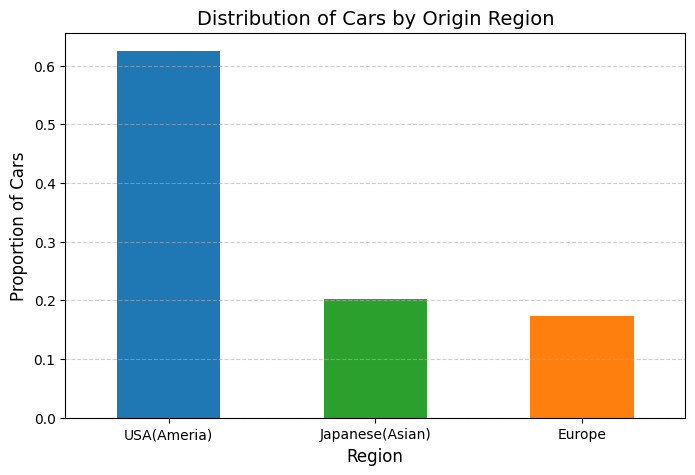

In [11]:
df['origin_names'] = df['origin'].map(REGION_NAMES)
origin_counts = df['origin_names'].value_counts(normalize=True)
plt.figure(figsize=(8,5))
origin_counts.plot(kind='bar', color=['#1f77b4', '#2ca02c', '#ff7f0e'])
plt.title("Distribution of Cars by Origin Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Proportion of Cars", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


##### Generally High MPG cars are fuel efficient/economic but it depends on various factors like shape , weight , engine types etc. Generally higher the weight lower the MPG because it will require more energy to run the vehicle.

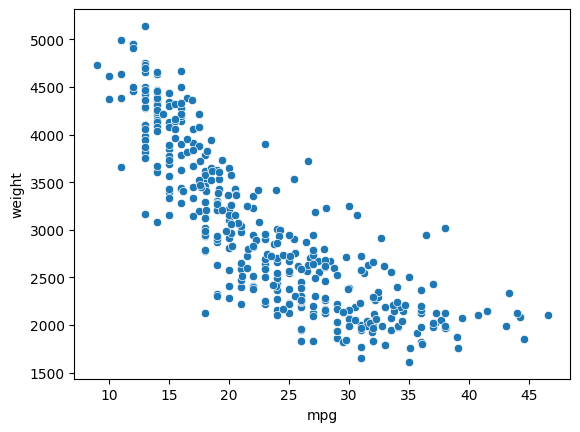

In [12]:
# What effect the weight has on MPG
sns.scatterplot(data = df , x = "mpg", y = "weight")
plt.show()
# Conclusion: we can directly see thats its almost inverse relationship as expected.

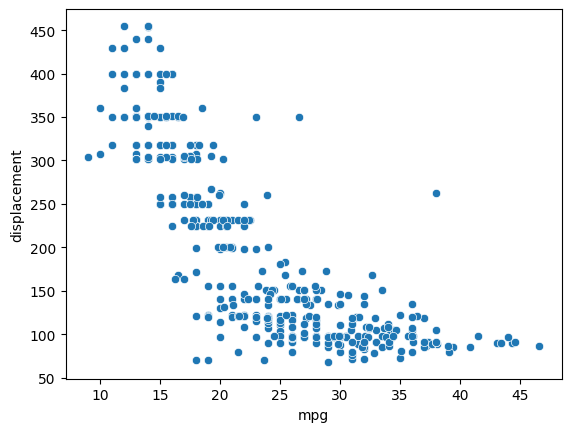

In [13]:
# we also know that larger displacement should also have almost inverse relationship with mpg
sns.scatterplot(data = df , x = "mpg", y = "displacement")
plt.show()
# Conclusion: there are some fluctuatios but its almost decreasing

In [14]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5])

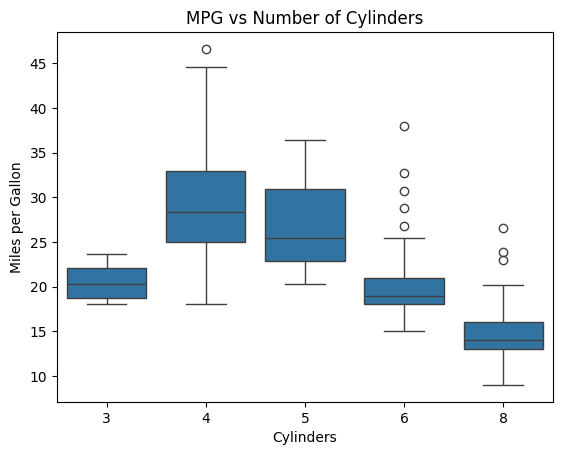

In [15]:
# Lets compare the cylinders with mpg
sns.boxplot(data = df , x = "cylinders", y = "mpg")
plt.title('MPG vs Number of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Miles per Gallon')
plt.show()

# We can see all other no of cylinders showing the expected behaviour (later study of outliers) of decreasing the mpg
# as we increase the number of cylinders except number of cylinders '3' and it can depend of several other factors like
# car model etc. We will further study 


### Interesting observation

In [16]:
# Here we have observed that all cars having the cylinder quantity 3 were showing different behaviour as expected 
# in the above graph so upon checking it shows that all those cars data having 3 cylinders are manufactured in Region 3
# which is Japan(Japanese/Asia) cars, So may be it could be the case with the manufacturing of cars in Japan.
REGION_NAMES[int(df[df['cylinders']==3]['origin'].unique()[0])]

'Japanese(Asian)'

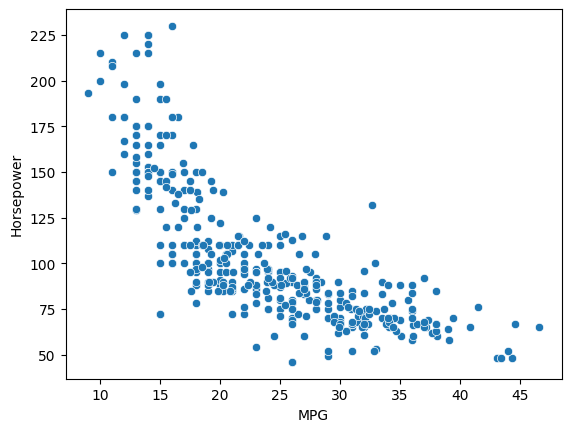

In [17]:
# As expected it also have inverse relationship
sns.scatterplot(data = df , x = "mpg", y = "horsepower")
plt.xlabel("MPG")
plt.ylabel("Horsepower")
plt.show()

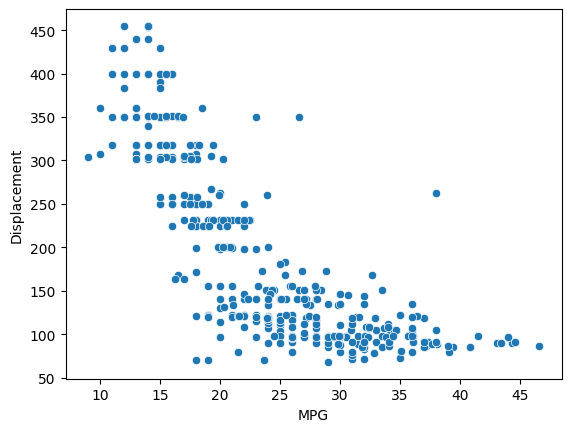

In [18]:
# As expected it also have inverse relationship
sns.scatterplot(data = df , x = "mpg", y = "displacement")
plt.xlabel("MPG")
plt.ylabel("Displacement")
plt.show()

In [19]:
df['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

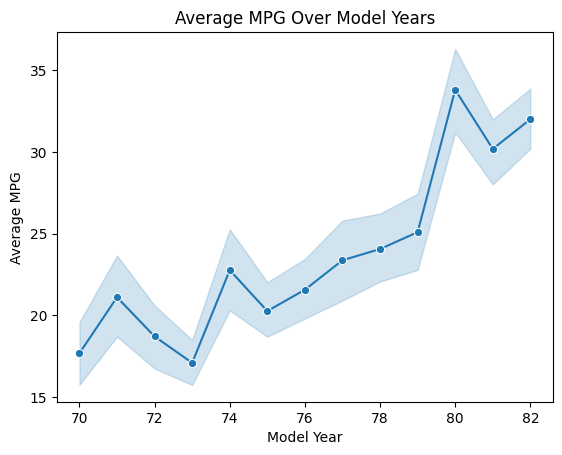

In [20]:
# we can see from the lineplot that with little exception between year 71 to 73 , all other years have increasing
# trend over the period of time which indicates that cars made in future are more fuel economic
sns.lineplot(x='model_year', y='mpg', data=df, estimator='mean', marker='o')
plt.title('Average MPG Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.show()

In [23]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name', 'origin_names'],
      dtype='object')

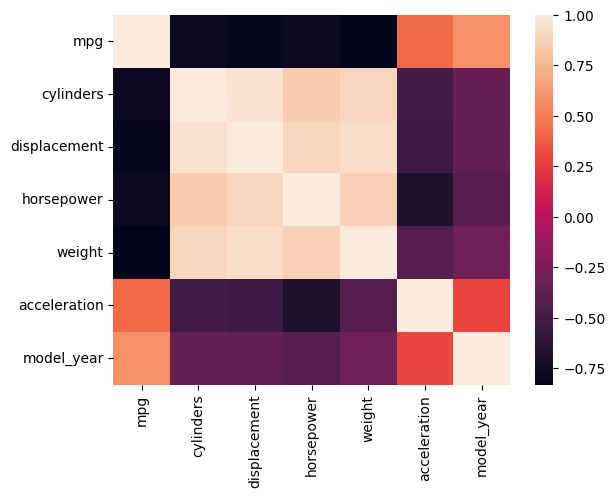

In [24]:
corr = df.drop(["car_name","origin","origin_names"], axis = 1).corr()
sns.heatmap(corr)
plt.show()

#### We can see the following facts from just the correlation matrix
1. As timed passed the displacement decresed which is inversly related to MPG so hence , MPG increased showing positive correlation between MPG and model year.
2. As time passed the weight of the cars also decresed hence MPG increased.
3. Over the years horsepower also decreased.

In [25]:
def detect_outliers(df:pd.DataFrame)->pd.DataFrame:
    numeric_cols = df.select_dtypes(["float64", "int64"]).columns
    outlier_summary = {}
    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_summary[col] = {
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outlier_count': outliers.count(),
            'outlier_indices': outliers.index.tolist()
        }
    return pd.DataFrame(outlier_summary)

In [26]:
outliers_df = detect_outliers(df)

In [27]:
outliers_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
Q1,17.0,4.0,105.0,75.0,2225.25,13.775,73.0,1.0
Q3,29.0,8.0,275.75,126.0,3614.75,17.025,79.0,2.0
IQR,12.0,4.0,170.75,51.0,1389.5,3.25,6.0,1.0
lower_bound,-1.0,-2.0,-151.125,-1.5,141.0,8.9,64.0,-0.5
upper_bound,47.0,14.0,531.875,202.5,5699.0,21.9,88.0,3.5
outlier_count,0,0,0,10,0,11,0,0
outlier_indices,[],[],[],"[6, 7, 8, 13, 25, 27, 67, 94, 95, 116]",[],"[7, 9, 11, 59, 195, 196, 209, 299, 300, 326, 394]",[],[]


In [28]:
horsepower_outliers = df.iloc[outliers_df['horsepower']['outlier_indices']]


In [29]:
horsepower_outliers
# A very interesting situation from this outlier, we can consider these as rare events we can 
# see that America has manufactured very high horsepower cars in 1970 till 1973 and continued
# which includes chevrolet , dodge , ford.
# and in 1973 Europe also started to make less horsepower e.g fiat.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,origin_names
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,USA(Ameria)
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,USA(Ameria)
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,USA(Ameria)
13,14.0,8,455.0,225.0,3086.0,10.0,70,1,buick estate wagon (sw),USA(Ameria)
25,10.0,8,360.0,215.0,4615.0,14.0,70,1,ford f250,USA(Ameria)
27,11.0,8,318.0,210.0,4382.0,13.5,70,1,dodge d200,USA(Ameria)
68,13.0,8,350.0,155.0,4502.0,13.5,72,1,buick lesabre custom,USA(Ameria)
95,12.0,8,455.0,225.0,4951.0,11.0,73,1,buick electra 225 custom,USA(Ameria)
96,13.0,8,360.0,175.0,3821.0,11.0,73,1,amc ambassador brougham,USA(Ameria)
117,29.0,4,68.0,49.0,1867.0,19.5,73,2,fiat 128,Europe


In [30]:
print(outliers_df['acceleration']['outlier_indices'])
print(df.index)

[7, 9, 11, 59, 195, 196, 209, 299, 300, 326, 394]
Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       388, 389, 390, 391, 392, 393, 394, 395, 396, 397],
      dtype='int64', length=392)


In [31]:
acceleration_outliers = df.loc[outliers_df['acceleration']['outlier_indices']]

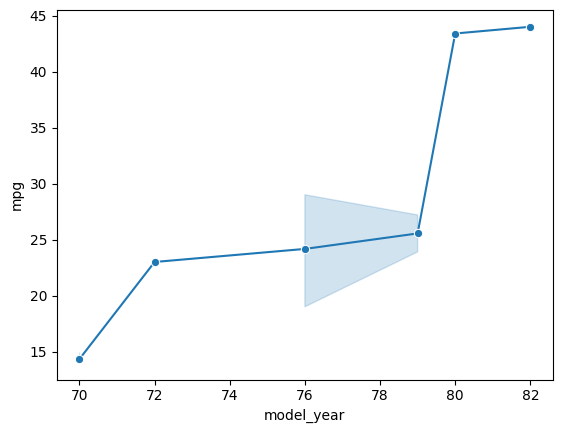

In [32]:
sns.lineplot(data = acceleration_outliers, y = "mpg", x = "model_year",estimator='mean', marker='o')
plt.show()

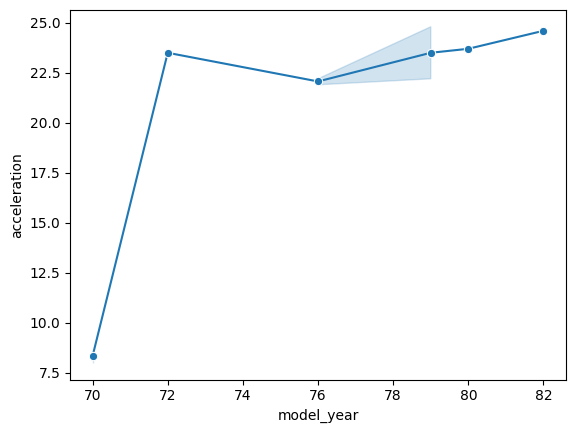

In [33]:
sns.lineplot(data = acceleration_outliers, y = "acceleration", x = "model_year",estimator='mean', marker='o')
plt.show()

## Hypothesis testing

#### Null Hypothesis (Ho): Mean MPG (USA cars) = Mean MPG(Non-USA Cars)
#### Alternate Hypothesis: Mean MPG (USA cars) != Mean MPG(Non-USA Cars)

In [34]:
mean_mpg_by_origin = df.groupby('origin')['mpg'].mean()
print(mean_mpg_by_origin)
# 1. We can see that mean MPG is less of USA Cars than Non-USA Cars but is it significantly different 
# 2. Significantly less

origin
1    20.033469
2    27.602941
3    30.450633
Name: mpg, dtype: float64


In [35]:
# 1. significantly different: We will Independent 2 sample test 
# Checking the assumptions
# i. Normality | CLT (VAlID here)
# ii. independent samples (VALID here)
# iii. Homogeneity of Variance (Will use levene test) VALID
from scipy.stats import levene
usa_mpg = df[df['origin'] == 1]['mpg']
non_usa_mpg = df[df['origin'] != 1]['mpg']
stat, p_value = levene(usa_mpg, non_usa_mpg)
print(f"Levene’s test statistic: {stat:.4f}, p-value: {p_value:.4f}")
if p_value > 0.05:
    print("Variances are equal (assumption of homogeneity holds)")
else:
    print("Variances are not equal (use Welch’s t-test instead)")

Levene’s test statistic: 0.2351, p-value: 0.6281
Variances are equal (assumption of homogeneity holds)


In [36]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(usa_mpg, non_usa_mpg, equal_var=True)
if p_value > 0.05:
    print("There isnt enough evidence to reject the null hypothesis")
else:
    print("Reject Null Hypothesis")

Reject Null Hypothesis


In [37]:
# Checking for left and right tailed test 
# First Alternate hypothesis: H1: mean MPG USA < mean MPG Non-USA
if t_stat < 0:
    p_val_left = p_value / 2
else: 
    p_value_left = 1 - (p_value/2)
    
print(f"Left-tailed p-value: {p_val_left:.4f}")
if p_val_left < 0.05:
    print("Reject H0: USA cars have significantly LESS MPG than Japan cars.")
else:
    print("Fail to reject H0: No evidence that USA cars have less MPG.")

Left-tailed p-value: 0.0000
Reject H0: USA cars have significantly LESS MPG than Japan cars.


In [38]:
# Just doing here for education anyone of left and right can be performed
if t_stat > 0:  # USA mean is greater
    p_val_right = p_value / 2
else:
    p_val_right = 1 - (p_value / 2)

print(f"Right-tailed p-value: {p_val_right:.4f}")
if p_val_right < 0.05:
    print("Reject H0: USA cars have significantly HIGHER MPG than Japan cars.")
else:
    print("Fail to reject H0: No evidence that USA cars have higher MPG.")


Right-tailed p-value: 1.0000
Fail to reject H0: No evidence that USA cars have higher MPG.


In [39]:
median_weight = df['weight'].median()

In [40]:
heavy_vehicles = df[df['weight'] > median_weight]
light_vehicles = df[df['weight'] <= median_weight]

In [41]:
heavy_vehicles.shape, light_vehicles.shape

((196, 10), (196, 10))

In [42]:
heavy_vehicles.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,origin_names
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,USA(Ameria)
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,USA(Ameria)
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,USA(Ameria)
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,USA(Ameria)
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,USA(Ameria)


In [43]:
light_vehicles.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,origin_names
14,24.0,4,113.0,95.0,2372.0,15.0,70,3,toyota corona mark ii,Japanese(Asian)
16,18.0,6,199.0,97.0,2774.0,15.5,70,1,amc hornet,USA(Ameria)
17,21.0,6,200.0,85.0,2587.0,16.0,70,1,ford maverick,USA(Ameria)
18,27.0,4,97.0,88.0,2130.0,14.5,70,3,datsun pl510,Japanese(Asian)
19,26.0,4,97.0,46.0,1835.0,20.5,70,2,volkswagen 1131 deluxe sedan,Europe


In [44]:
def ttest_ind_assumptions(series1:pd.Series, series2:pd.Series)->bool:
    # 1. significantly different: We will Independent 2 sample test 
    # Checking the assumptions
    # i. Normality | CLT (VAlID here)
    # ii. independent samples (VALID here)
    # iii. Homogeneity of Variance (Will use levene test) VALID
    from scipy.stats import levene
    stat, p_value = levene(series1, series2)
    print(f"Levene’s test statistic: {stat:.4f}, p-value: {p_value:.4f}")
    if p_value > 0.05:
        print("Variances are equal (assumption of homogeneity holds)")
    else:
        print("Variances are not equal (use Welch’s t-test instead)")

In [45]:
ttest_ind_assumptions(light_vehicles['mpg'], heavy_vehicles['mpg'])

Levene’s test statistic: 14.5024, p-value: 0.0002
Variances are not equal (use Welch’s t-test instead)


In [46]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(light_vehicles['mpg'], heavy_vehicles['mpg'], equal_var=False)
if p_value > 0.05:
    print("There isnt enough evidence to reject the null hypothesis")
else:
    print("Reject Null Hypothesis")

Reject Null Hypothesis


In [47]:
if t_stat > 0:
    p_val_right = p_value / 2
else: 
    p_value_right = 1 - (p_value/2)
    
print(f"right-tailed p-value: {p_val_right:.4f}")
if p_val_right < 0.05:
    print("Reject H0: light cars have significantly MORE MPG than heavy cars.")
else:
    print("Fail to reject H0: No enough evidence to reject H0")

right-tailed p-value: 0.0000
Reject H0: light cars have significantly MORE MPG than heavy cars.


### Before vs After 1976 Models (FUEL CRISIS)
#### Ho: mean MPG before 1976 models = mean MPG after 1976
#### H1: mean MPG before 1976 models != mean MPG after 1976 (Not checking the direction here but we will after this)

In [63]:
vehicles_before_1976 = df[df['model_year'] <= 76].copy()
vehicles_after_1976 = df[df['model_year'] > 76].copy()

In [64]:
vehicles_before_1976.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,origin_names
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,USA(Ameria)
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,USA(Ameria)
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,USA(Ameria)
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,USA(Ameria)
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,USA(Ameria)


In [65]:
vehicles_after_1976.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,origin_names
216,31.5,4,98.0,68.0,2045.0,18.5,77,3,honda accord cvcc,Japanese(Asian)
217,30.0,4,111.0,80.0,2155.0,14.8,77,1,buick opel isuzu deluxe,USA(Ameria)
218,36.0,4,79.0,58.0,1825.0,18.6,77,2,renault 5 gtl,Europe
219,25.5,4,122.0,96.0,2300.0,15.5,77,1,plymouth arrow gs,USA(Ameria)
220,33.5,4,85.0,70.0,1945.0,16.8,77,3,datsun f-10 hatchback,Japanese(Asian)


##### We didnt perform the hypothesis yet but we can see clearly from the head that there is a change in mpg , cylinders , displacement and horsepower post crisis era.... But we will prove this using test.

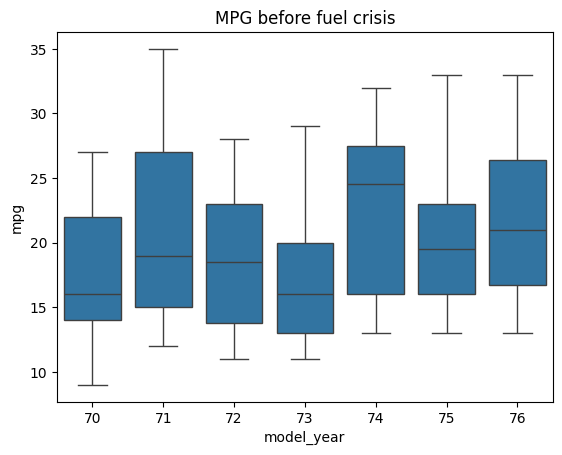

In [66]:
sns.boxplot(data = vehicles_before_1976,x = 'model_year', y = 'mpg')
plt.title("MPG before fuel crisis")
plt.show()

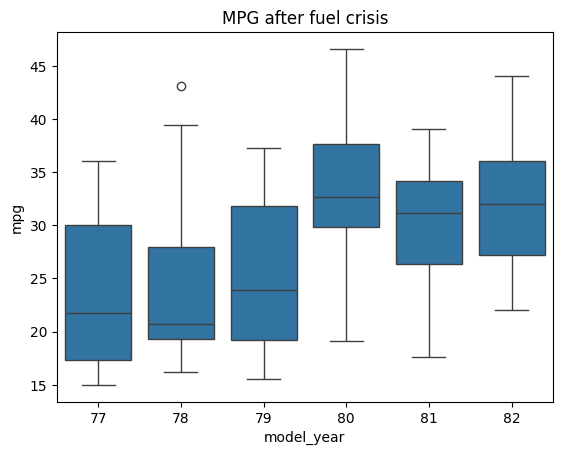

In [67]:
sns.boxplot(data = vehicles_after_1976,x = 'model_year', y = 'mpg')
plt.title("MPG after fuel crisis")
plt.show()

#### Now performing the hypothesis test

In [68]:
# First lets check for the assumptions
ttest_ind_assumptions(vehicles_before_1976['mpg'], vehicles_after_1976['mpg'])

Levene’s test statistic: 14.5034, p-value: 0.0002
Variances are not equal (use Welch’s t-test instead)


In [69]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(vehicles_before_1976['mpg'], vehicles_after_1976['mpg'], equal_var=False)
if p_value > 0.05:
    print("There isnt enough evidence to reject the null hypothesis")
else:
    print("Reject Null Hypothesis")

Reject Null Hypothesis


In [70]:
if t_stat > 0:
    p_val_right = p_value / 2
else: 
    p_value_right = 1 - (p_value/2)
    
print(f"right-tailed p-value: {p_val_right:.4f}")
if p_val_right < 0.05:
    print("Reject H0: MPG of vehicles after post fuel crisis are more")
else:
    print("Fail to reject H0: No enough evidence to reject H0")

right-tailed p-value: 0.0000
Reject H0: MPG of vehicles after post fuel crisis are more


#### Hence proved: Both have significant difference

### We can also findout which region has been effected by this crisis , as this crsis was on most regions but USA should be more effected according to history so lets check it

In [75]:
vehicles_before_1976["origin_name"] = vehicles_before_1976["origin"].map(REGION_NAMES) 
vehicles_after_1976["origin_name"] = vehicles_after_1976["origin"].map(REGION_NAMES) 

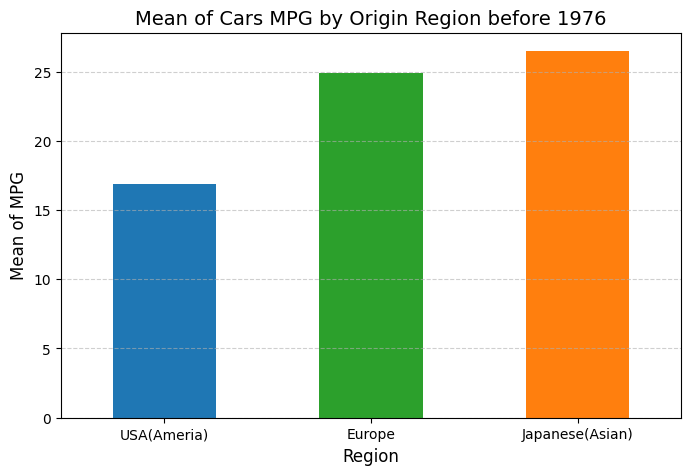

In [74]:
means_before_1976 = vehicles_before_1976.groupby("origin_name")["mpg"].mean().sort_values(ascending  =True)
plt.figure(figsize=(8,5))
means_before_1976.plot(kind='bar', color=['#1f77b4', '#2ca02c', '#ff7f0e'])
plt.title("Mean of Cars MPG by Origin Region before 1976", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Mean of MPG", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

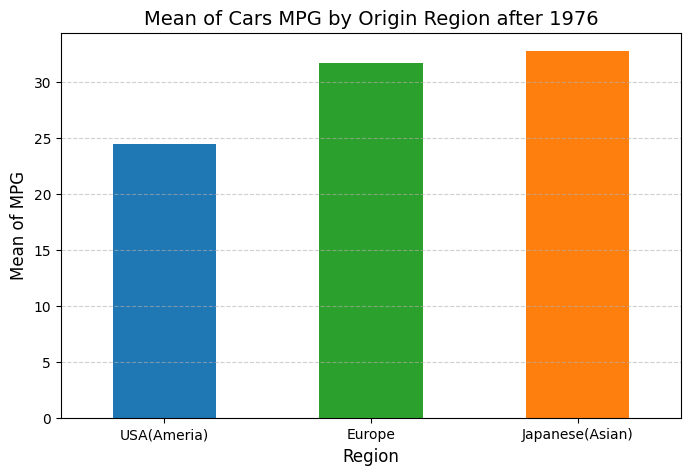

In [77]:
means_after_1976 = vehicles_after_1976.groupby("origin_name")["mpg"].mean().sort_values(ascending  =True)
plt.figure(figsize=(8,5))
means_after_1976.plot(kind='bar', color=['#1f77b4', '#2ca02c', '#ff7f0e'])
plt.title("Mean of Cars MPG by Origin Region after 1976", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Mean of MPG", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### We can see from the charts that mean MPG of all regions have increased significantly

## Multi-Group Comparison
#### 1. Is there a significant difference in MPG among different cylinder counts [8, 4, 6, 3, 5]?

In [90]:
mpg_4 = df[df['cylinders'] == 4]['mpg'].copy()
mpg_6 = df[df['cylinders'] == 6]['mpg'].copy()
mpg_8 = df[df['cylinders'] == 8]['mpg'].copy()
mpg_3 = df[df['cylinders'] == 3]['mpg'].copy()
mpg_5 = df[df['cylinders'] == 5]['mpg'].copy()


In [91]:
from scipy.stats import f_oneway,levene
stat, p_value = levene(mpg_4, mpg_6, mpg_8, mpg_3 , mpg_5)
print(f"Levene’s test statistic: {stat:.4f}, p-value: {p_value:.4f}")
if p_value > 0.05:
    print("Variances are equal (assumption of homogeneity holds)")
else:
    print("Variances are not equal (use Welch’s anova instead)")

# We could use the code below if variences were equal (Homogenity)

# f_stat, p_value = f_oneway(mpg_4, mpg_6, mpg_8)
# print("F-statistic:", f_stat)
# print("p-value:", p_value)
# if p_value < 0.05:
#     print(f"Reject Ho: There is significant evidence that mean values of mpg is different across cylinders")
# else:
#     print(f"Failed to Reject Ho: There is no significant evidence that mean values of mpg is different across cylinders")


Levene’s test statistic: 14.0963, p-value: 0.0000
Variances are not equal (use Welch’s anova instead)


In [87]:
import pingouin as pg


In [89]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [100]:
welch_anova_results = pg.welch_anova(dv='mpg', between='cylinders', data=df)
welch_anova_results
welch_anova_p_value = welch_anova_results['p-unc'][0]
welch_anova_f_stat = welch_anova_results['F'][0]
welch_anova_p_value,welch_anova_f_stat
if welch_anova_p_value < 0.05:
    print("Reject Ho: There is significant difference across mpg of different cylinders")
else:
    print("Failed to Reject Ho: There is no significant difference across mpg of different cylinders")

Reject Ho: There is significant difference across mpg of different cylinders


### Now we can do pairwise comparison using post hoc test

In [101]:
gh_res = pg.pairwise_gameshowell(dv='mpg', between='cylinders', data=df)
print(gh_res)

   A  B    mean(A)    mean(B)       diff        se          T          df  \
0  3  4  20.550000  29.283920  -8.733920  1.343782  -6.499506    3.618106   
1  3  5  20.550000  27.366667  -6.816667  4.920563  -1.385343    2.293917   
2  3  6  20.550000  19.973494   0.576506  1.349367   0.427242    3.677615   
3  3  8  20.550000  14.963107   5.586893  1.312352   4.257159    3.291566   
4  4  5  29.283920  27.366667   1.917253  4.767532   0.402148    2.028741   
5  4  6  29.283920  19.973494   9.310426  0.581556  16.009513  223.274210   
6  4  8  29.283920  14.963107  14.320813  0.489577  29.251415  299.732645   
7  5  6  27.366667  19.973494   7.393173  4.769109   1.550221    2.031425   
8  5  8  27.366667  14.963107  12.403560  4.758769   2.606464    2.013867   
9  6  8  19.973494  14.963107   5.010387  0.504704   9.927383  147.385458   

           pval    hedges  
0  1.772700e-02 -1.543662  
1  6.826142e-01 -1.030543  
2  9.901774e-01  0.150712  
3  7.752457e-02  1.960807  
4  9.904784e

In [102]:
def interpret_gameshowell(results, alpha=0.05):
    print("📊 Games–Howell Post-hoc Summary:\n")
    for _, row in results.iterrows():
        g1, g2 = row['A'], row['B']
        pval = row['pval']
        diff = row['mean(A)'] - row['mean(B)']
        if pval < alpha:
            print(f"✅ {g1} vs {g2}: Significant difference (mean diff = {diff:.2f}, p = {pval:.4f})")
        else:
            print(f"❌ {g1} vs {g2}: No significant difference (mean diff = {diff:.2f}, p = {pval:.4f})")

In [103]:
interpret_gameshowell(gh_res)

📊 Games–Howell Post-hoc Summary:

✅ 3.0 vs 4.0: Significant difference (mean diff = -8.73, p = 0.0177)
❌ 3.0 vs 5.0: No significant difference (mean diff = -6.82, p = 0.6826)
❌ 3.0 vs 6.0: No significant difference (mean diff = 0.58, p = 0.9902)
❌ 3.0 vs 8.0: No significant difference (mean diff = 5.59, p = 0.0775)
❌ 4.0 vs 5.0: No significant difference (mean diff = 1.92, p = 0.9905)
✅ 4.0 vs 6.0: Significant difference (mean diff = 9.31, p = 0.0000)
✅ 4.0 vs 8.0: Significant difference (mean diff = 14.32, p = 0.0000)
❌ 5.0 vs 6.0: No significant difference (mean diff = 7.39, p = 0.6237)
❌ 5.0 vs 8.0: No significant difference (mean diff = 12.40, p = 0.3327)
✅ 6.0 vs 8.0: Significant difference (mean diff = 5.01, p = 0.0000)


## Do cars from different origins have significantly different average weights?
#### Ho: mean weights of different origin vehicles are same

In [105]:
welch_anova_results_weight = pg.welch_anova(dv='weight', between='origin', data=df)
welch_anova_results_weight
welch_anova_p_value = welch_anova_results_weight['p-unc'][0]
welch_anova_f_stat = welch_anova_results_weight['F'][0]
welch_anova_p_value,welch_anova_f_stat
if welch_anova_p_value < 0.05:
    print("Reject Ho: There is significant difference of mean weights across different origins")
else:
    print("Failed to Reject Ho: There is no significant difference of mean weights across different origins")
gh_res = pg.pairwise_gameshowell(dv='mpg', between='origin', data=df)
print(gh_res)
interpret_gameshowell(gh_res)

Reject Ho: There is significant difference of mean weights across different origins
   A  B    mean(A)    mean(B)       diff        se          T          df  \
0  1  2  20.033469  27.602941  -7.569472  0.897801  -8.431121  105.320342   
1  1  3  20.033469  30.450633 -10.417164  0.799235 -13.033912  138.635946   
2  2  3  27.602941  30.450633  -2.847692  1.051772  -2.707518  137.851137   

           pval    hedges  
0  6.068479e-13 -1.166974  
1  1.365574e-14 -1.634797  
2  2.073366e-02 -0.448161  
📊 Games–Howell Post-hoc Summary:

✅ 1.0 vs 2.0: Significant difference (mean diff = -7.57, p = 0.0000)
✅ 1.0 vs 3.0: Significant difference (mean diff = -10.42, p = 0.0000)
✅ 2.0 vs 3.0: Significant difference (mean diff = -2.85, p = 0.0207)


## Interaction: Does the effect of cylinders on MPG depend on origin?

In [108]:
df.dropna(inplace = True)

In [109]:
aov = pg.anova(dv='mpg', between=['cylinders', 'origin'], data=df, detailed=True)
print(aov)

               Source            SS     DF            MS             F  \
0           cylinders  2.763693e+05    4.0  6.909232e+04  3.358129e+03   
1              origin  2.071595e-11    2.0  1.035798e-11  5.034339e-13   
2  cylinders * origin  2.759860e+04    8.0  3.449825e+03  1.676736e+02   
3            Residual  7.880090e+03  383.0  2.057465e+01           NaN   

           p-unc           np2  
0  1.410454e-274  9.722775e-01  
1   1.000000e+00  2.628898e-15  
2  1.834227e-112  7.778923e-01  
3            NaN           NaN  


c:\Users\Awais\Desktop\MPG-Analysis\venv\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\Users\Awais\Desktop\MPG-Analysis\venv\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covariance of constraints does not have full '


## 🧠 Step-by-Step Interpretation

### 🔹 1. Main Effect — Cylinders

**F(4, 383) = 3358.13, p < 0.001**
**Partial η² = 0.972 (huge effect size)**

✅ **Interpretation:**
There’s a massive difference in mean MPG across cylinder groups.
Cars with more cylinders (6 or 8) have much lower fuel efficiency than 4-cylinder cars.
The η² value of **0.97** means that **97% of the explainable variance in MPG** is due to differences in cylinder count.

➡️ **Practical meaning:** Cylinder count is the **dominant driver** of MPG differences — a near-deterministic relationship.

---

### 🔹 2. Main Effect — Origin

**F(2, 383) ≈ 0, p = 1.0**
**Partial η² ≈ 0.0**

❌ **Interpretation:**
No significant difference in MPG when comparing cars from different origins (USA, Europe, Japan), after accounting for cylinders.
In other words, once you control for how big the engines are, **country of origin adds no predictive value.**

➡️ **Practical meaning:** “American” vs “Japanese” label doesn’t matter — what matters is **engine size and design**, not where it’s built.

---

### 🔹 3. Interaction Effect — Cylinders × Origin

**F(8, 383) = 167.67, p < 0.001**
**Partial η² = 0.778 (large effect)**

✅ **Interpretation:**
There’s a strong **interaction** between cylinder count and origin —
this means the **impact of cylinders on MPG depends on the car’s origin.**

**For example:**

* Japanese 4-cylinder cars might be **more fuel-efficient** than American 4-cylinder cars (better tuning/weight ratio).
* But among 8-cylinder cars, MPG differences between origins might **shrink or disappear.**

➡️ **Practical meaning:** Manufacturers in different regions **optimize engine efficiency differently.**

---

### 🔹 4. Residual

Represents **within-group variance** (differences between cars with the same cylinder–origin combo).
**Small SS_residual (7,880.1)** → model explains most variance.

✅ **Interpretation:**
Your two-way ANOVA model captures **almost all variance in MPG (around 97–98% explained)**.
Only ~2–3% of the variability is due to other minor factors (like car weight, model year, or random noise).

---

### 🔧 **Summary (Plain English Version)**

| **Question**                                                      | **Answer**                           |
| ----------------------------------------------------------------- | ------------------------------------ |
| Do cylinder counts affect fuel efficiency?                        | ✅ Yes, hugely.                       |
| Does car origin affect fuel efficiency?                           | ❌ No main effect.                    |
| Does the relationship between cylinders and MPG depend on origin? | ✅ Yes, strong interaction.           |
| How much of MPG variance is explained?                            | ≈ 97.5% total (mostly by cylinders). |

---



### And lol dont worry residual has f , p and np2 as NaN because we dont have those things for residuals